# Finmod, Options

This is a short demo for ...

## Navigation:
* [Setup](#Setup)
  * [Imports](#H0_imports)
    * [Built-in Imports](#H0_builtin)
    * [Custom Imports](#H0_custom)
    * [Third party imports](#H0_third)
  * [Versions](#H0_versions)
  * [Settings](#H0_settings)
* [Market Matching Demonstration](#H1)

### Imports<a class="anchor" id="H0_imports"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from finmod import Stock, CallOption, PutOption
from finmod import plot_payoff
from finmod.functions.derivatives import option as calc

### Settings<a class="anchor" id="H0_settings"></a>

In [5]:
# Warning supressing
import warnings
warnings.filterwarnings('ignore')

# Matplotlib settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Pandas settings
pd.set_option(
    "display.max_rows", 60,
    "display.max_columns", 20,
    "display.max_colwidth", 30,
    "precision", 5,
    "expand_frame_repr", False,
    "display.date_dayfirst", False
)

# Options

## Plotting Strategies

In [3]:
kwargs = dict(
    invline_kwds={"alpha":0.5},
    portfline_kwds={"color":"k"},
    pricerange=np.arange(10,50)
)

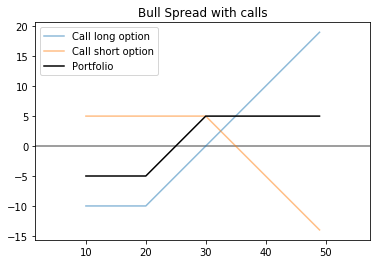

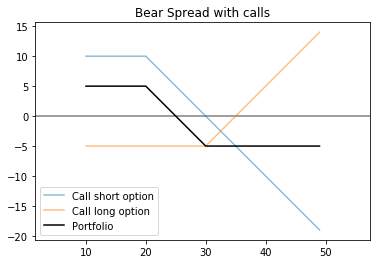

In [4]:
plot_payoff(
    CallOption(strike=20, premium=10, position="long"),
    CallOption(strike=30, premium=5, position="short"),
    title="Bull Spread with calls",
    **kwargs
)
plt.figure()
plot_payoff(
    CallOption(strike=20, premium=10, position="short"),
    CallOption(strike=30, premium=5, position="long"),
    title="Bear Spread with calls",
    **kwargs
)

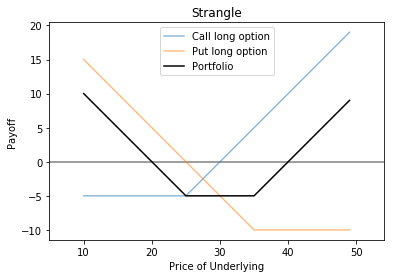

In [9]:
plot_payoff(
    CallOption(strike=25, premium=5, position="long"),
    PutOption(strike=35, premium=10, position="long"),
    title="Strangle",
    **kwargs
)

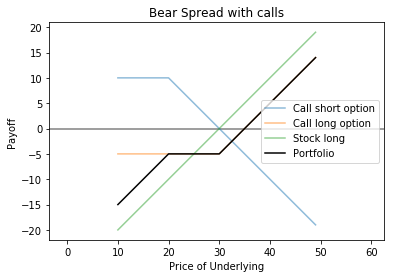

In [7]:
plot_payoff(
    CallOption(strike=20, premium=10, position="short"),
    CallOption(strike=30, premium=5, position="long"),
    Stock(30, position="long"),
    title="Bear Spread with calls",
    **kwargs
)

# Interactive Graph

In [16]:
from ipywidgets import interact

@interact(x_axis = ["S", "K", "T", "r", "sigma"], 
          S=(1, 10, 1), 
          K=(1, 10, 1),
          T=(0, 10, 1),
          r=(0, 0.5, 0.01),
          sigma=(0, 0.5, 0.01),
          style=["call", "put"],
          fixed_axes = True,
         )
def plot_european_call(x_axis, style, fixed_axes, **kwargs):
    ratios = ("r", "sigma")
    kwargs[x_axis] = (
        np.linspace(0, 0.5, 50) if x_axis in ("r", "sigma") 
        else np.linspace(0.1, 20, 50) if x_axis in ("S", "K")
        else np.linspace(0.1, 20, 50)
    )
    S = kwargs["S"]
    K = kwargs["K"]
    T = kwargs["T"]
    r = kwargs["r"]
    sigma = kwargs["sigma"]
    
    if style == "call":
        price = calc.european_call_price(S=S, K=K, T=T, r=r, sigma=sigma)
    elif style == "put":
        price = calc.european_put_price(S=S, K=K, T=T, r=r, sigma=sigma)
    
    fig = plt.figure(figsize=[7,7])
    ax = plt.axes()
    ax.plot(kwargs[x_axis], price, label=f"Option {style}")

    if fixed_axes:
        if x_axis in ("S", "K"):
            plt.xlim(0, 11)
        elif x_axis in ("r", "sigma"):
            plt.xlim(0, 0.5)
        elif x_axis in ("T"):
            plt.xlim(0, 10)
        plt.ylim(0, 11)
        
    if x_axis in ("S"):
        ax.plot([min(ax.get_xlim()), max(ax.get_xlim())], [min(ax.get_xlim()), max(ax.get_xlim())], label="Stock", linestyle='--', color="k")

    plt.title("Option price")
    plt.ylabel("price")
    plt.xlabel(x_axis)
    plt.legend()

interactive(children=(Dropdown(description='x_axis', options=('S', 'K', 'T', 'r', 'sigma'), value='S'), Dropdo…